In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
import streamlit as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the sales data from CSV file
df_sale = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
df_sale

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,12/2/2004 0:00,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,1/31/2005 0:00,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,3/1/2005 0:00,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,3/28/2005 0:00,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


In [3]:
# print shape of the DataFrame
df_sale.shape

(2823, 25)

In [4]:
# Check for duplicate rows in the df_sale DataFrame
df_sale.duplicated().sum()

0

In [5]:
# Check unique data types in dataframe
df_sale.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [6]:
# print name of the columns
df_sale.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [7]:
# info and NAN counts
df_sale.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [8]:
# Convert the ORDERDATE column to a datetime data type
df_sale['ORDERDATE'] = pd.to_datetime(df_sale['ORDERDATE'])

In [9]:
# checking unique values in column 'DEALSIZE'
unique_deal_size = pd.unique(df_sale['DEALSIZE'])
print(unique_deal_size)

['Small' 'Medium' 'Large']


In [10]:
#  checking unique values in column 'PRODUCTLINE'
unique_PRODUCTLINE = pd.unique(df_sale['PRODUCTLINE'])
print(unique_PRODUCTLINE)

['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']


In [11]:
# columns that I don't need
drop_list = ['STATUS', 'ORDERNUMBER', 'ADDRESSLINE2', 'STATE', 'TERRITORY', 'CUSTOMERNAME', 'PHONE', 'POSTALCODE', 'ADDRESSLINE1', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME']

In [12]:
# dropping the columns in the drop_list
df_sale.drop(drop_list, axis=1)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CITY,COUNTRY,DEALSIZE
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,Motorcycles,95,S10_1678,NYC,USA,Small
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,Motorcycles,95,S10_1678,Reims,France,Small
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,Motorcycles,95,S10_1678,Paris,France,Medium
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,Motorcycles,95,S10_1678,Pasadena,USA,Medium
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,Motorcycles,95,S10_1678,San Francisco,USA,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,4,12,2004,Ships,54,S72_3212,Madrid,Spain,Small
2819,29,100.00,1,3978.51,2005-01-31,1,1,2005,Ships,54,S72_3212,Oulu,Finland,Medium
2820,43,100.00,4,5417.57,2005-03-01,1,3,2005,Ships,54,S72_3212,Madrid,Spain,Medium
2821,34,62.24,1,2116.16,2005-03-28,1,3,2005,Ships,54,S72_3212,Toulouse,France,Small


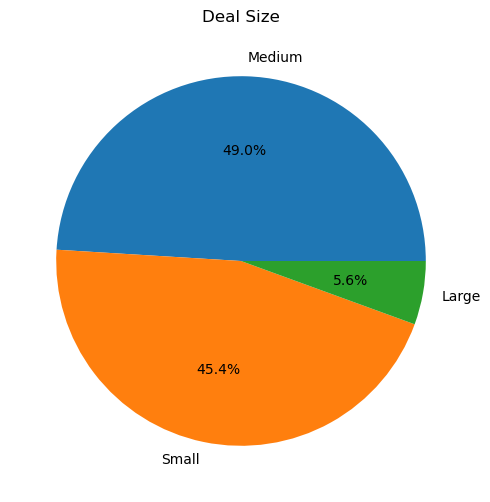

In [13]:
# Pie Chart of Deal Size
deal_size_counts = df_sale['DEALSIZE'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(deal_size_counts.values, labels=deal_size_counts.index, autopct='%1.1f%%')
plt.title('Deal Size')
plt.show()

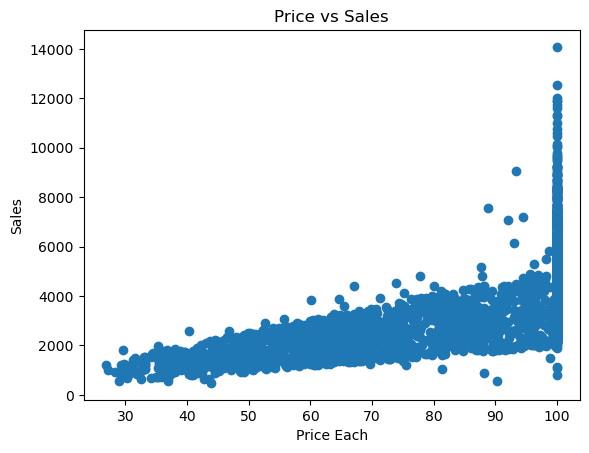

In [14]:
# relationship between sales and price
plt.scatter(df_sale['PRICEEACH'], df_sale['SALES'])
plt.title('Price vs Sales')
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.show()

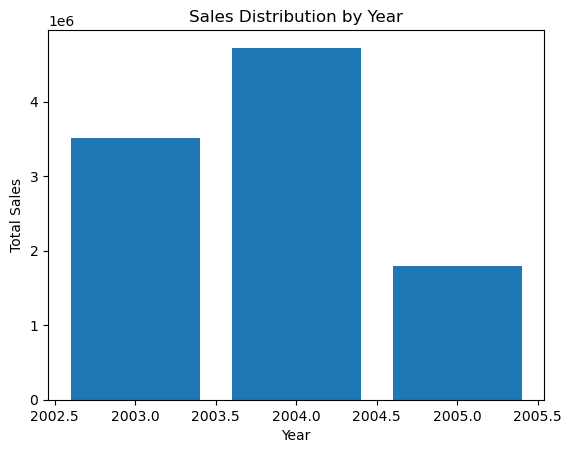

In [15]:
# sales by year

# Group sales by year
sales_by_year = df_sale.groupby('YEAR_ID')['SALES'].sum()

# Plot histogram of sales distribution by year
plt.bar(sales_by_year.index, sales_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Sales Distribution by Year')
plt.show()

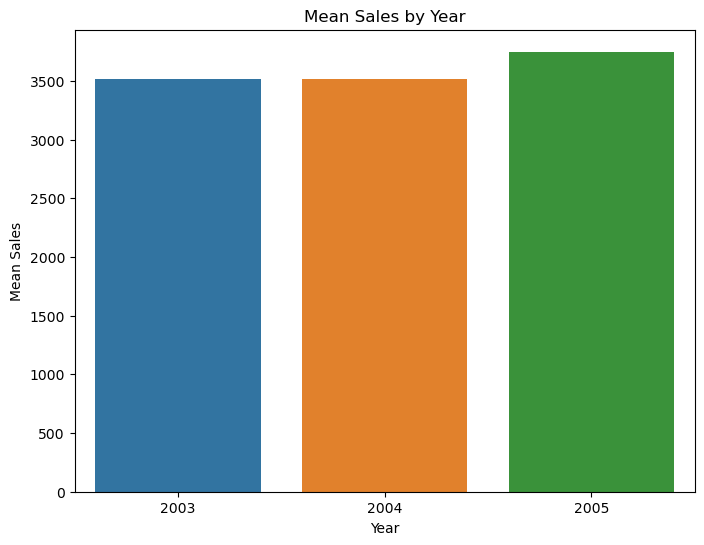

In [16]:
# Barplot of Mean Sales by Year
mean_sales_year = df_sale.groupby('YEAR_ID')['SALES'].mean()
plt.figure(figsize=(8,6))
sns.barplot(x=mean_sales_year.index, y=mean_sales_year.values)
plt.title('Mean Sales by Year')
plt.xlabel('Year')
plt.ylabel('Mean Sales')
plt.show()

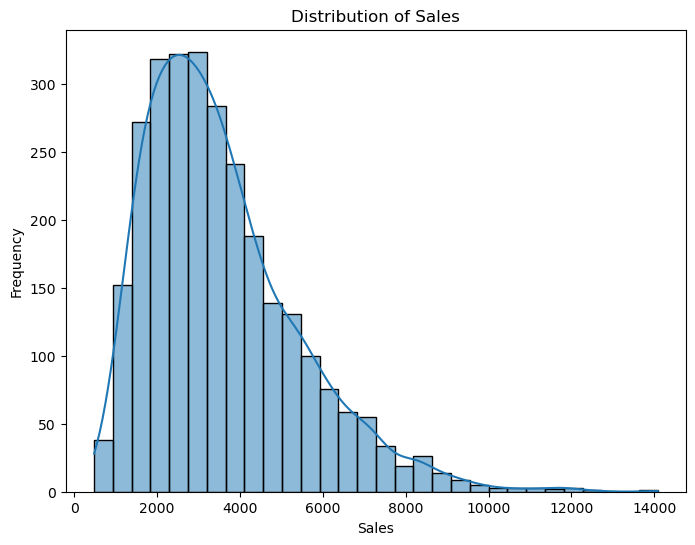

In [17]:
# Histogram of Sales
plt.figure(figsize=(8,6))
sns.histplot(df_sale['SALES'], bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

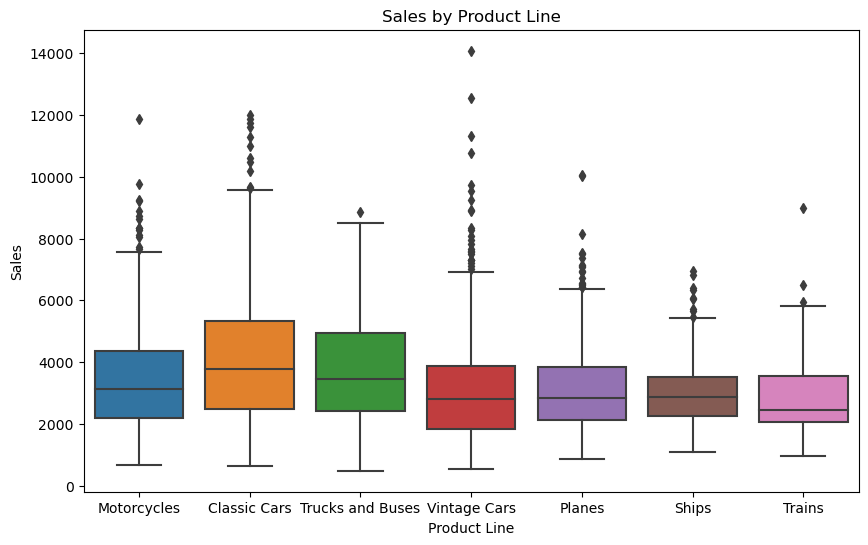

In [18]:
# Boxplot of Sales by Product Line
plt.figure(figsize=(10,6))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df_sale)
plt.title('Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.show()

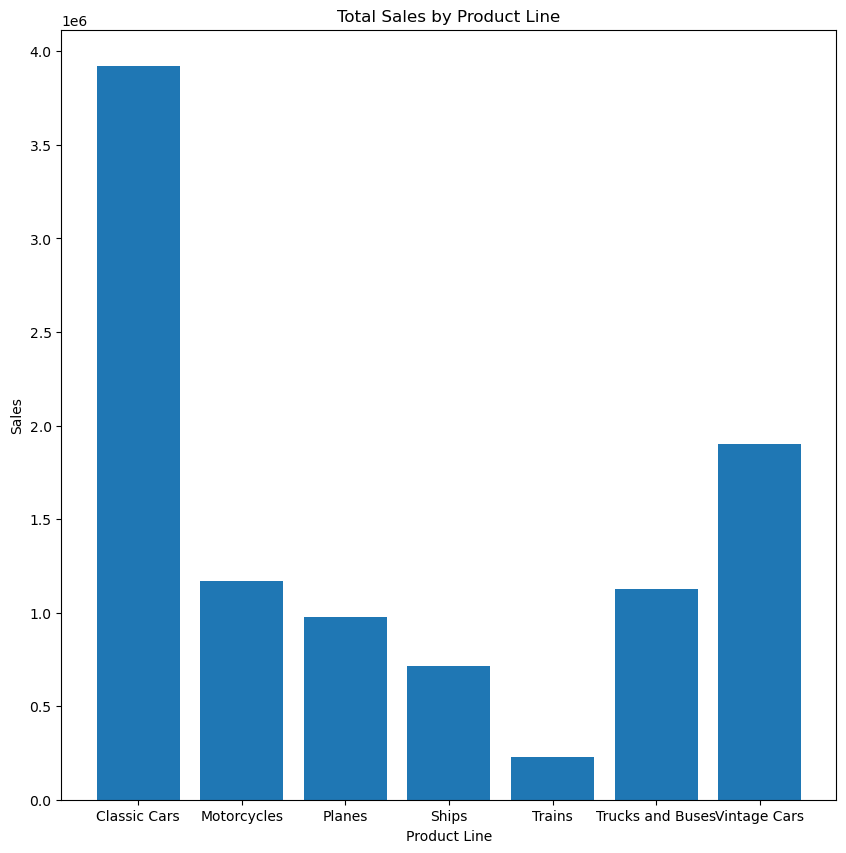

In [19]:
# Group the sales data by product line and sum the sales for each category
product_sales = df_sale.groupby('PRODUCTLINE')['SALES'].sum()

# Create a bar chart to visualize the distribution of sales by product line
plt.figure(figsize=(10, 10))
plt.bar(product_sales.index, product_sales.values)

# Set the title and axis labels
plt.title('Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')

# Display the chart
plt.show()

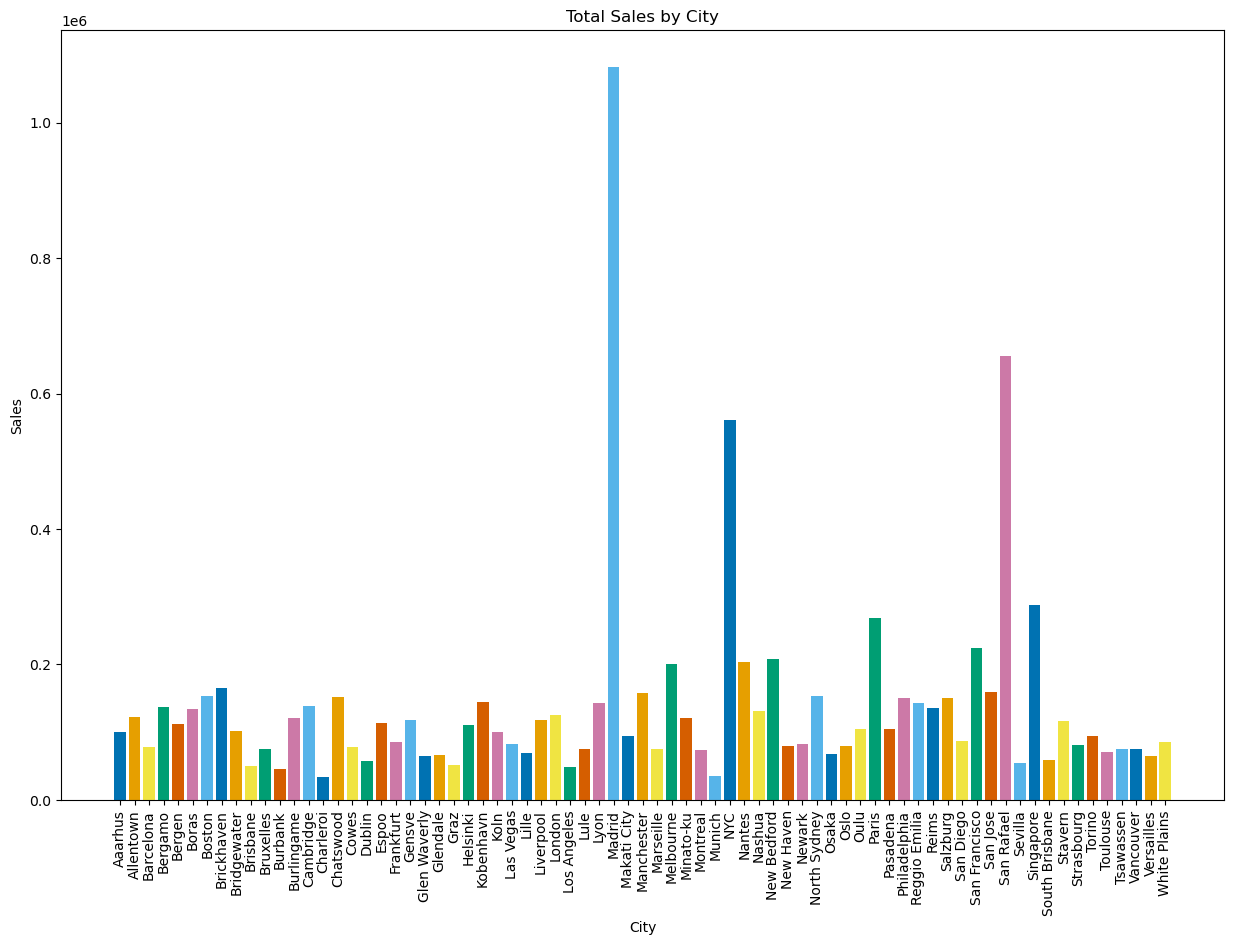

In [20]:
# Group the data by city and calculate total sales
city_sales = df_sale.groupby('CITY')['SALES'].sum()

# Create a bar chart to visualize the distribution of sales by city
plt.figure(figsize=(15,10))
plt.bar(city_sales.index, city_sales.values, color=['#0072B2','#E69F00','#F0E442','#009E73','#D55E00','#CC79A7','#56B4E9'])

# Set the title and axis labels
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Sales')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the chart
plt.show()

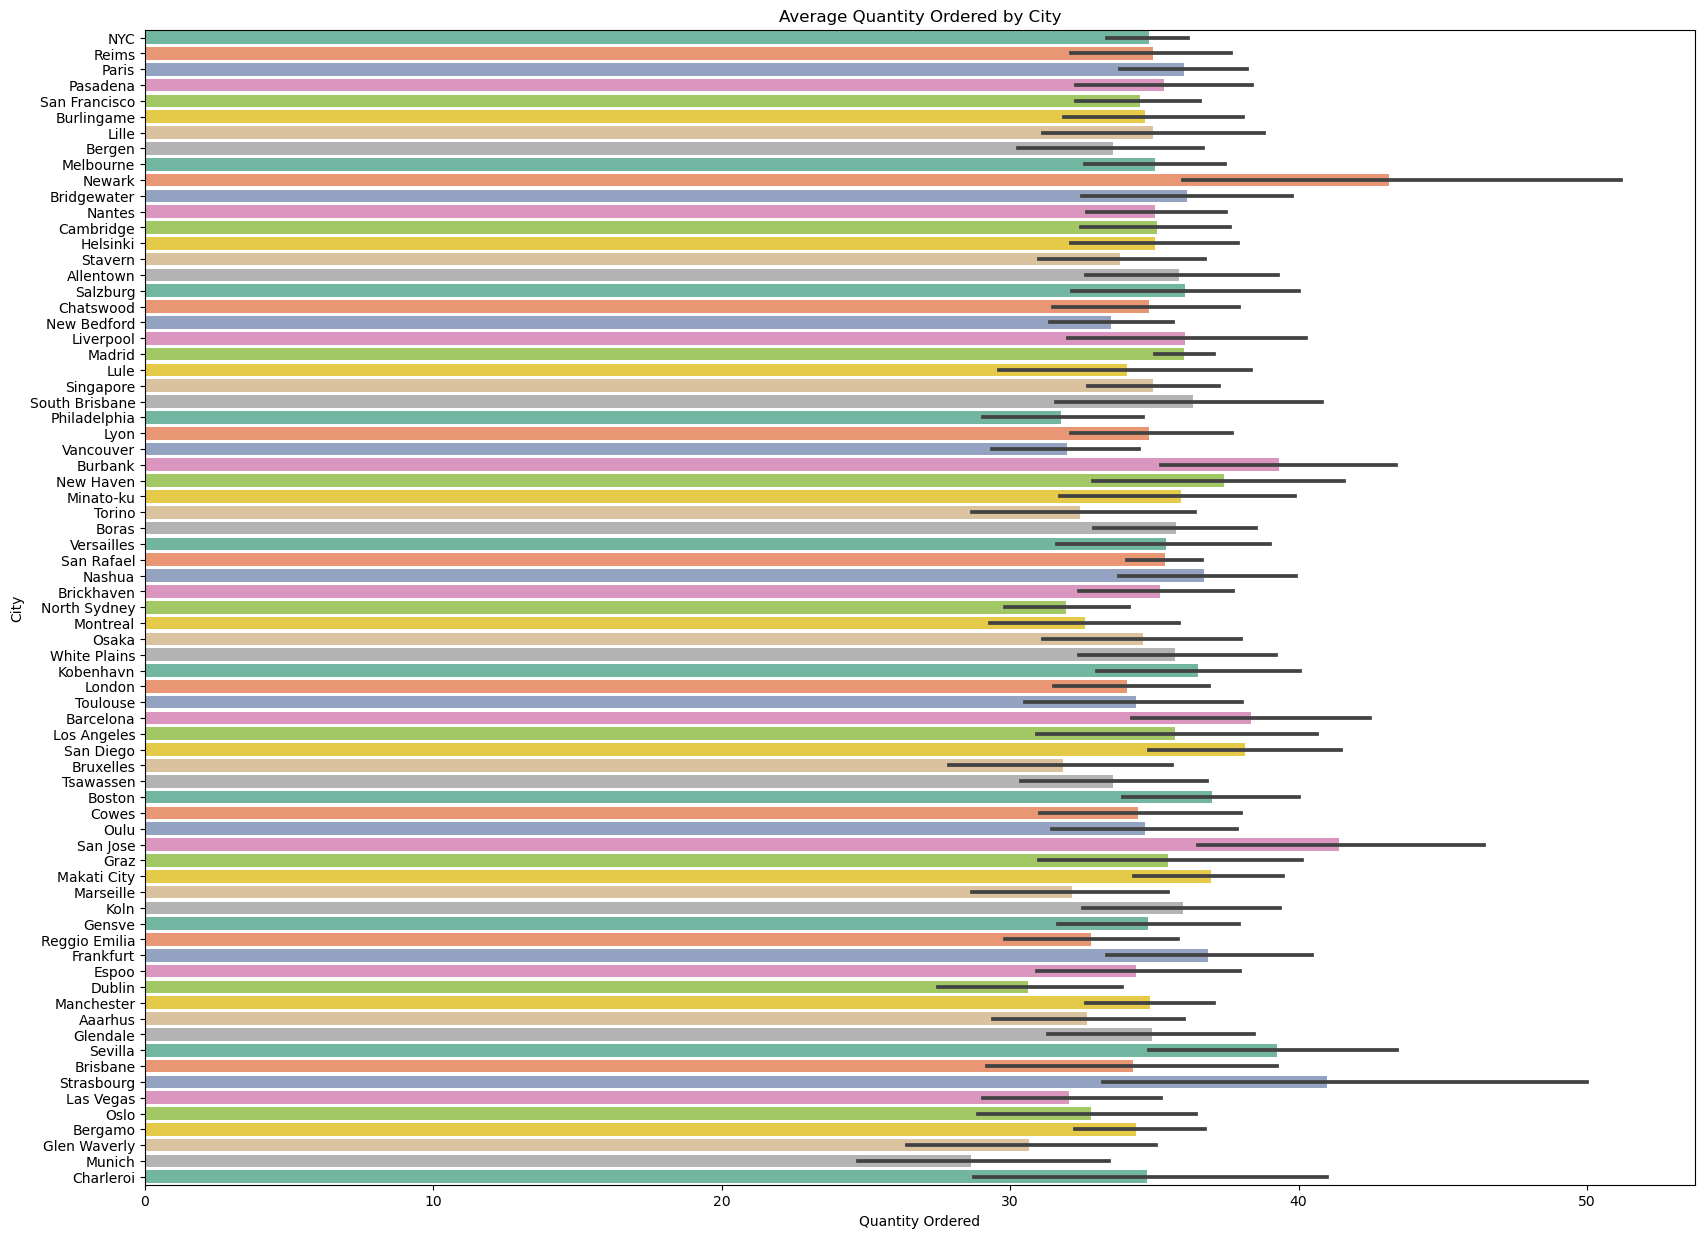

In [21]:
# Group the data by city and calculate the average quantity ordered
city_quantity = df_sale.groupby('CITY')['QUANTITYORDERED'].mean().sort_values()

# Create a bar chart to visualize the average quantity ordered by city
plt.figure(figsize=(20, 15))
sns.barplot(x='QUANTITYORDERED', y='CITY', data=df_sale, palette='Set2')

# Set the title and axis labels
plt.title('Average Quantity Ordered by City')
plt.xlabel('Quantity Ordered')
plt.ylabel('City')

# Display the chart
plt.show()

Newark and Strasbourg have the highest average sales per order

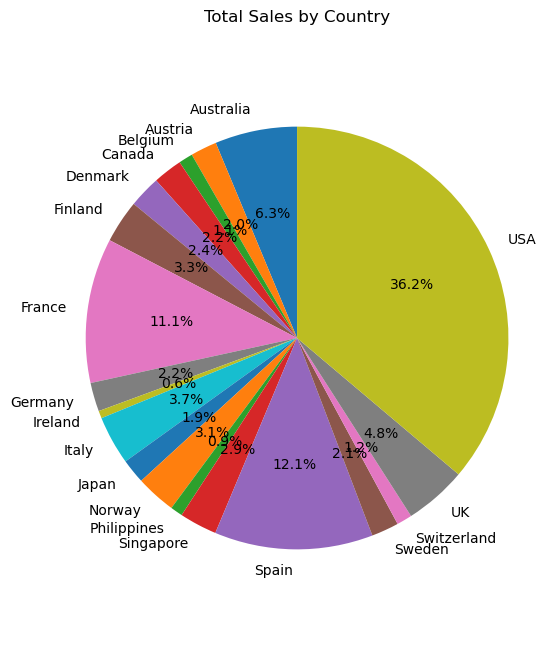

In [22]:
# Calculate total sales by country
sales_by_country = df_sale.groupby('COUNTRY')['SALES'].sum()

# Create a pie chart
fig, ax = plt.subplots(figsize=(6, 8))
ax.pie(sales_by_country.values, labels=sales_by_country.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('Total Sales by Country')

# Display the chart
plt.show()

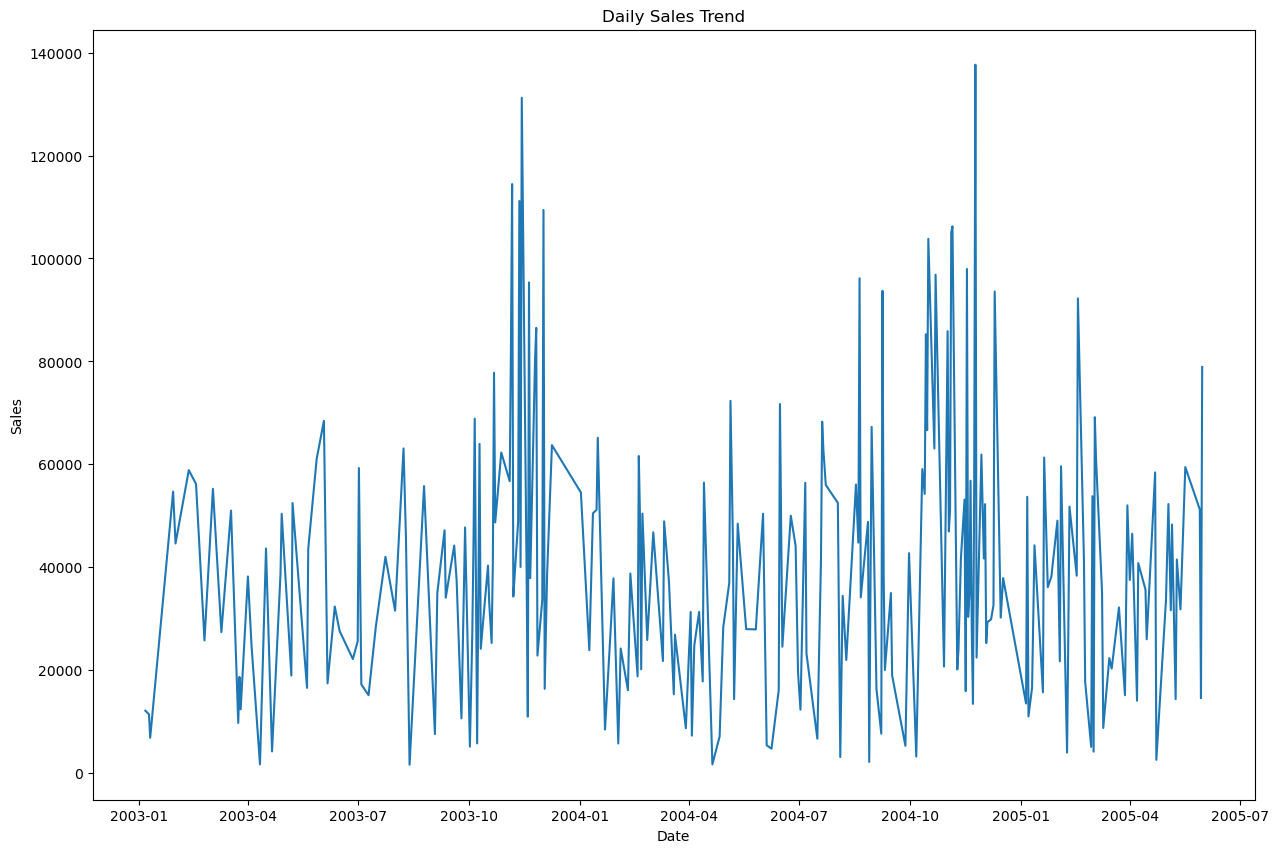

In [23]:
# Group the sales data by order date and sum the sales for each day
daily_sales = df_sale.groupby('ORDERDATE')['SALES'].sum()

# Create a time series plot to visualize the trend of sales over time
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(daily_sales.index, daily_sales.values)


# Set the title and axis labels
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')

# Display the chart
plt.show()

# commentary 

- Looking at the pie representation of the dealsize, it indicates that most customer purchases are usually medium (49%) or large (45.4%). Large size deals only represent 5.6% of the deals.

- Looking at the scatter plot that shows the relationship between sales and price, it indicates that the more expensive the product is, the more sales it has. There is a huge spike for products priced at 100, showing that they tend to sell the most.

- Looking at the bar plot representing the sales by year, it indicates that the organization had the most sales in 2004, then 2003, and the least amount of sales in 2005.

- Looking at the barplot representing the mean sales by year, it indicates that the organization has a slightly higher average sale in 2005.

- The histogram for the distribution of sales shows a skewed distribution, more specifically a right-skewed distribution. This distribution translates the pie sales distribution very well, showing that most of the sales are small to medium, with a few large sales.

- The boxplot of sales by product line shows the usual amount of sales for each product line. For example, 75% of the sales for the motorcycles product line are typically between 2200 and 7900. It also shows some unusually high sales that surpass 7900 all the way to 12000.

- The barplot of total sales by product line indicates that the classic cars and vintage cars product lines have the highest total sales. This proves that these product lines are in high demand.

- The barplot representing the total sales by city indicates that Madrid, San Rafael, and NYC have the highest total sales. It shows that these cities are more lucrative for the organization and have a high demand for the products sold.

- The barplot for the average quantity ordered by city indicates that Newark and Strasbourg have the highest average quantity ordered per order. Meaning that customers in these cities tend to order more products per transaction.

- The pie representing the total sales by country indicates that the top three countries that have the most sales are the USA, which holds 36.2%, Spain with 12.1%, and France with 11.1%.

- Looking at the time series, we can see a huge spike in sales around the end of each year (Christmas). It indicates that the holiday season is a busy and lucrative time for the organization.

# Feature selection

- I aim to use purchase history and time-related information to create customer segments based on their buying behaviour and purchase patterns over time.

<Axes: >

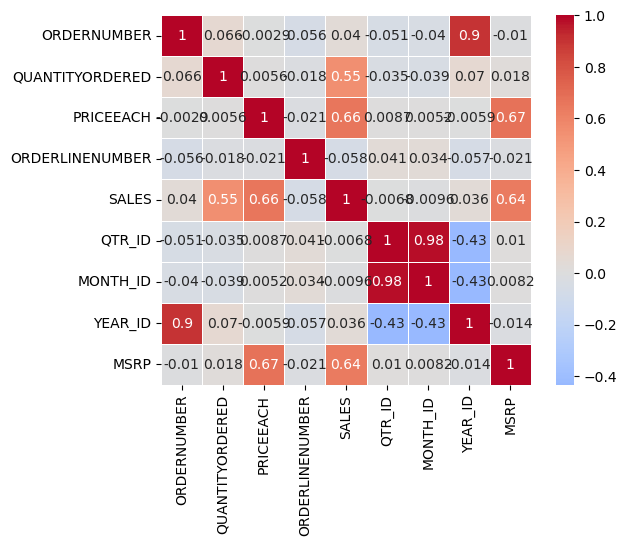

In [24]:
# Compute the correlation matrix
corr_matrix = df_sale.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, center=0, square=True, linewidths=0.5)

In [25]:
# correaltion matrix 
corr_matrix

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERNUMBER,1.000000,0.065543,-0.002935,-0.055550,0.039919,-0.051383,-0.039723,0.904596,-0.010280
QUANTITYORDERED,0.065543,1.000000,0.005564,-0.018397,0.551426,-0.035323,-0.039048,0.069535,0.017881
PRICEEACH,-0.002935,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625
ORDERLINENUMBER,-0.055550,-0.018397,-0.020965,1.000000,-0.058400,0.040716,0.034016,-0.057367,-0.021067
SALES,0.039919,0.551426,0.657841,-0.058400,1.000000,-0.006796,-0.009605,0.035647,0.635239
QTR_ID,-0.051383,-0.035323,0.008712,0.040716,-0.006796,1.000000,0.979300,-0.433052,0.010234
MONTH_ID,-0.039723,-0.039048,0.005152,0.034016,-0.009605,0.979300,1.000000,-0.430163,0.008170
YEAR_ID,0.904596,0.069535,-0.005938,-0.057367,0.035647,-0.433052,-0.430163,1.000000,-0.014310
MSRP,-0.010280,0.017881,0.670625,-0.021067,0.635239,0.010234,0.008170,-0.014310,1.000000


Based on the correlation matrix, here are some observations:
- We can see that there is a strong positive correlation (0.904) between the ORDERNUMBER and YEAR_ID variables. This suggests that the number of orders has been increasing over time.
- There is also a strong positive correlation (0.657) between the PRICEEACH and SALES variables, which makes sense since sales are determined by the price and the quantity ordered.
- the QUANTITYORDERED and SALES variables have a moderate positive correlation of 0.551, indicating that as the quantity ordered increases, so do the sales.

In [26]:
# create subset for my clustering data
df = df_sale[['QUANTITYORDERED', 'PRICEEACH', 'QTR_ID', 'PRODUCTLINE']]
df

,QUANTITYORDERED,PRICEEACH,QTR_ID,PRODUCTLINE
0,30,95.70,1,Motorcycles
1,34,81.35,2,Motorcycles
2,41,94.74,3,Motorcycles
3,45,83.26,3,Motorcycles
4,49,100.00,4,Motorcycles
...,...,...,...,...
2818,20,100.00,4,Ships
2819,29,100.00,1,Ships
2820,43,100.00,1,Ships
2821,34,62.24,1,Ships


In [27]:
# one-hot encode the 'PRODUCTLINE' column
df_encoded = pd.get_dummies(df, columns=['PRODUCTLINE'])

In [28]:
# Converting all columns with numbers to numerical data type
# select all columns with numbers
num_cols = df_encoded.select_dtypes(include='number').columns

# convert the selected columns to numerical data type
df_encoded[num_cols] = df_encoded[num_cols].astype('float64')

In [29]:
df_encoded

,QUANTITYORDERED,PRICEEACH,QTR_ID,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,30.0,95.70,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,34.0,81.35,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,41.0,94.74,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,45.0,83.26,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,49.0,100.00,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2818,20.0,100.00,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2819,29.0,100.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2820,43.0,100.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2821,34.0,62.24,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [30]:
# Display the summary statistics
df_encoded.describe().T

,count,mean,std,min,25%,50%,75%,max
QUANTITYORDERED,2823.0,35.092809,9.741443,6.00,27.00,35.0,43.0,97.0
PRICEEACH,2823.0,83.658544,20.174277,26.88,68.86,95.7,100.0,100.0
QTR_ID,2823.0,2.717676,1.203878,1.00,2.00,3.0,4.0,4.0
PRODUCTLINE_Classic Cars,2823.0,0.342543,0.474644,0.00,0.00,0.0,1.0,1.0
PRODUCTLINE_Motorcycles,2823.0,0.117251,0.321776,0.00,0.00,0.0,0.0,1.0
PRODUCTLINE_Planes,2823.0,0.108395,0.310934,0.00,0.00,0.0,0.0,1.0
PRODUCTLINE_Ships,2823.0,0.082891,0.275766,0.00,0.00,0.0,0.0,1.0
PRODUCTLINE_Trains,2823.0,0.027276,0.162915,0.00,0.00,0.0,0.0,1.0
PRODUCTLINE_Trucks and Buses,2823.0,0.106624,0.308689,0.00,0.00,0.0,0.0,1.0
PRODUCTLINE_Vintage Cars,2823.0,0.215019,0.410909,0.00,0.00,0.0,0.0,1.0


In [31]:
# normalize the data
# Create a scaler object
scaler = StandardScaler()

# Fit and transform the data
df_normalized = scaler.fit_transform(df_encoded)

# Convert the result back to a DataFrame
df_normalized = pd.DataFrame(df_normalized, columns=df_encoded.columns)

In [32]:
df_normalized

,QUANTITYORDERED,PRICEEACH,QTR_ID,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars
0,-0.522891,0.596978,-1.427039,-0.721812,2.743848,-0.348674,-0.300637,-0.167454,-0.34547,-0.523371
1,-0.112201,-0.114450,-0.596243,-0.721812,2.743848,-0.348674,-0.300637,-0.167454,-0.34547,-0.523371
2,0.606505,0.549384,0.234553,-0.721812,2.743848,-0.348674,-0.300637,-0.167454,-0.34547,-0.523371
3,1.017195,-0.019759,0.234553,-0.721812,2.743848,-0.348674,-0.300637,-0.167454,-0.34547,-0.523371
4,1.427884,0.810158,1.065350,-0.721812,2.743848,-0.348674,-0.300637,-0.167454,-0.34547,-0.523371
...,...,...,...,...,...,...,...,...,...,...
2818,-1.549615,0.810158,1.065350,-0.721812,-0.364452,-0.348674,3.326275,-0.167454,-0.34547,-0.523371
2819,-0.625563,0.810158,-1.427039,-0.721812,-0.364452,-0.348674,3.326275,-0.167454,-0.34547,-0.523371
2820,0.811850,0.810158,-1.427039,-0.721812,-0.364452,-0.348674,3.326275,-0.167454,-0.34547,-0.523371
2821,-0.112201,-1.061864,-1.427039,-0.721812,-0.364452,-0.348674,3.326275,-0.167454,-0.34547,-0.523371


# Unsupervised model

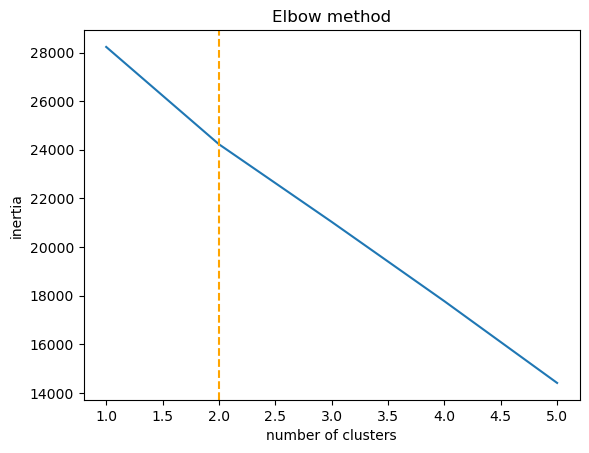

In [33]:
# finding the optimal number of cluster with the elbow method
# calculate the inertia
inertias = []
for n_clusters in range(1, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_normalized)
    inertias.append(kmeans.inertia_)
    
# plot the elbow curve
plt.plot(range(1, 6), inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.axvline(2, color='orange', ls='--')
plt.title('Elbow method')
plt.show()

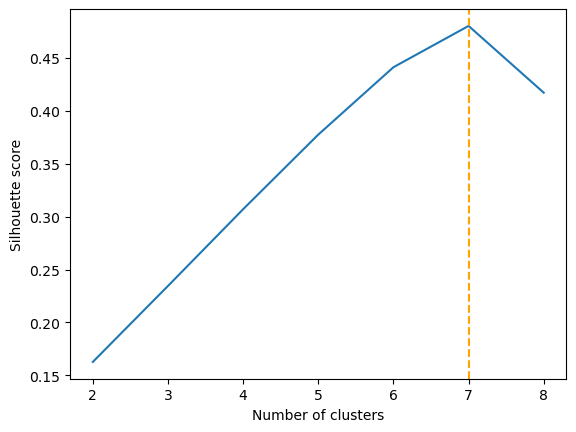

In [34]:
# finding the optimal number of cluster with the silhouette score
# calculate the silhouette score for different number of clusters
silhouette_scores = []
for n_clusters in range(2, 9):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_normalized)
    labels = kmeans.labels_
    score = silhouette_score(df_normalized, labels)
    silhouette_scores.append(score)

# plot the silhouette scores
plt.plot(range(2, 9), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.axvline(7, color='orange', ls='--')
plt.show()

# K-means model

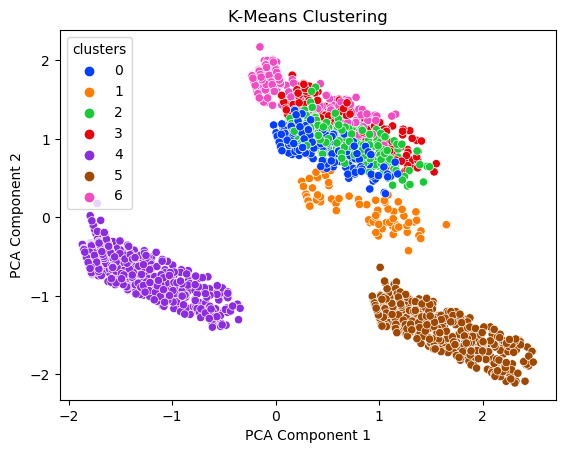

In [36]:
# create KMeans model
kmeans = KMeans(n_clusters=7, random_state=1)

# fit model and predict clusters
labels = kmeans.fit_predict(df_normalized)

# reduce dimensionality of data using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_normalized)

# create scatter plot of data points colored by cluster
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], hue=labels, palette='bright')
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='clusters', loc='upper left')
plt.show()

# Agglomerative Clustering model

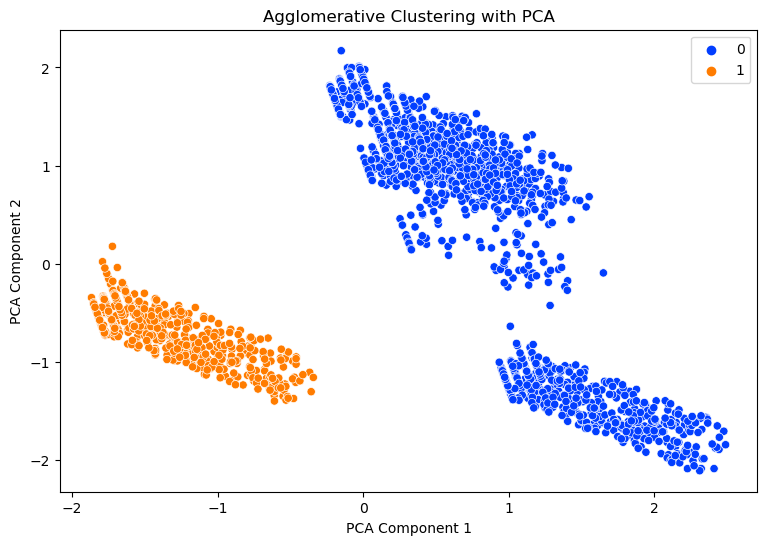

In [37]:
# create Agglomerative Clustering model
agg_clustering = AgglomerativeClustering()

# fit model and predict clusters
labels1 = agg_clustering.fit_predict(df_normalized)

# fit PCA to the normalized data
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df_normalized)

# create dataframe with PCA data and cluster labels
pca_df = pd.DataFrame({'pca1': pca_data[:, 0], 'pca2': pca_data[:, 1], 'cluster': labels1})

# create scatter plot of PCA data colored by cluster
plt.figure(figsize=(9, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette='bright')
plt.title('Agglomerative Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(loc='upper right')
plt.show()

# Gaussian Mixture Model 

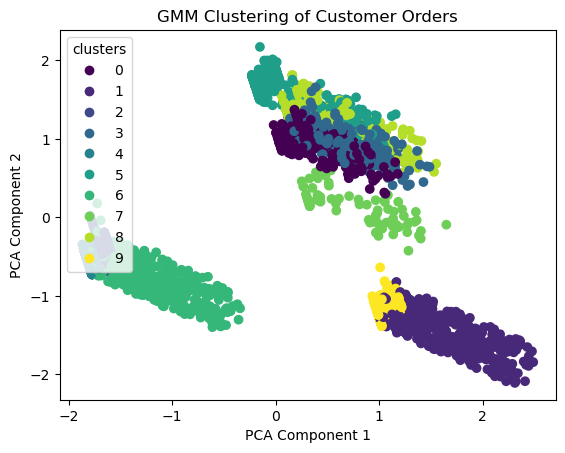

In [38]:
# Define range of number of clusters to test
range_n_clusters = range(2, 11)

# Fit GMM models and calculate BIC for each number of clusters
bic_scores = []
models = []
for n_clusters in range_n_clusters:
    gmm = GaussianMixture(n_components=n_clusters, random_state=0)
    gmm.fit(df_normalized)
    bic_scores.append(gmm.bic(df_normalized))
    models.append(gmm)

# Find the index of the model with the lowest BIC score
best_index = np.argmin(bic_scores)

# Get the best model
best_gmm = models[best_index]

# Get cluster labels
labels11 = best_gmm.predict(df_normalized)

# Compute first two principal components
pca = PCA(n_components=2)
pca.fit(df_normalized)
X_pca = pca.transform(df_normalized)

# Create scatter plot of first two principal components colored by cluster label
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels11, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('GMM Clustering of Customer Orders')
plt.legend(*scatter.legend_elements(), title='clusters', loc='upper left')

plt.show()

- The agglomerative clustering model only created 2 clusters when the visualization show that there could be more than 2. 
- I will only consider the clusters from the K-mean model and the GMM model

In [39]:
# add the cluster labels to the original DataFrame
df_encoded['KM cluster'] = labels0

# Add cluster labels to df
df_encoded['Cluster GMM'] = labels11

In [40]:
# Counts the number of samples in each cluster generated by the K-means model.
df_encoded['KM cluster'].value_counts()

4    967
5    607
3    331
2    306
6    301
0    234
1     77
Name: KM cluster, dtype: int64

In [41]:
# Counts the number of samples in each cluster generated by the GMM model.
df_encoded['Cluster GMM'].value_counts()

1    390
6    387
4    346
8    331
3    306
5    301
2    234
0    234
9    217
7     77
Name: Cluster GMM, dtype: int64

In [42]:
# Create subset for the K-means models
km_df = df_encoded.drop(['Cluster GMM'], axis=1)

In [43]:
# Create subset for the GMM models
gmm_df = df_encoded.drop(['KM cluster'], axis=1)

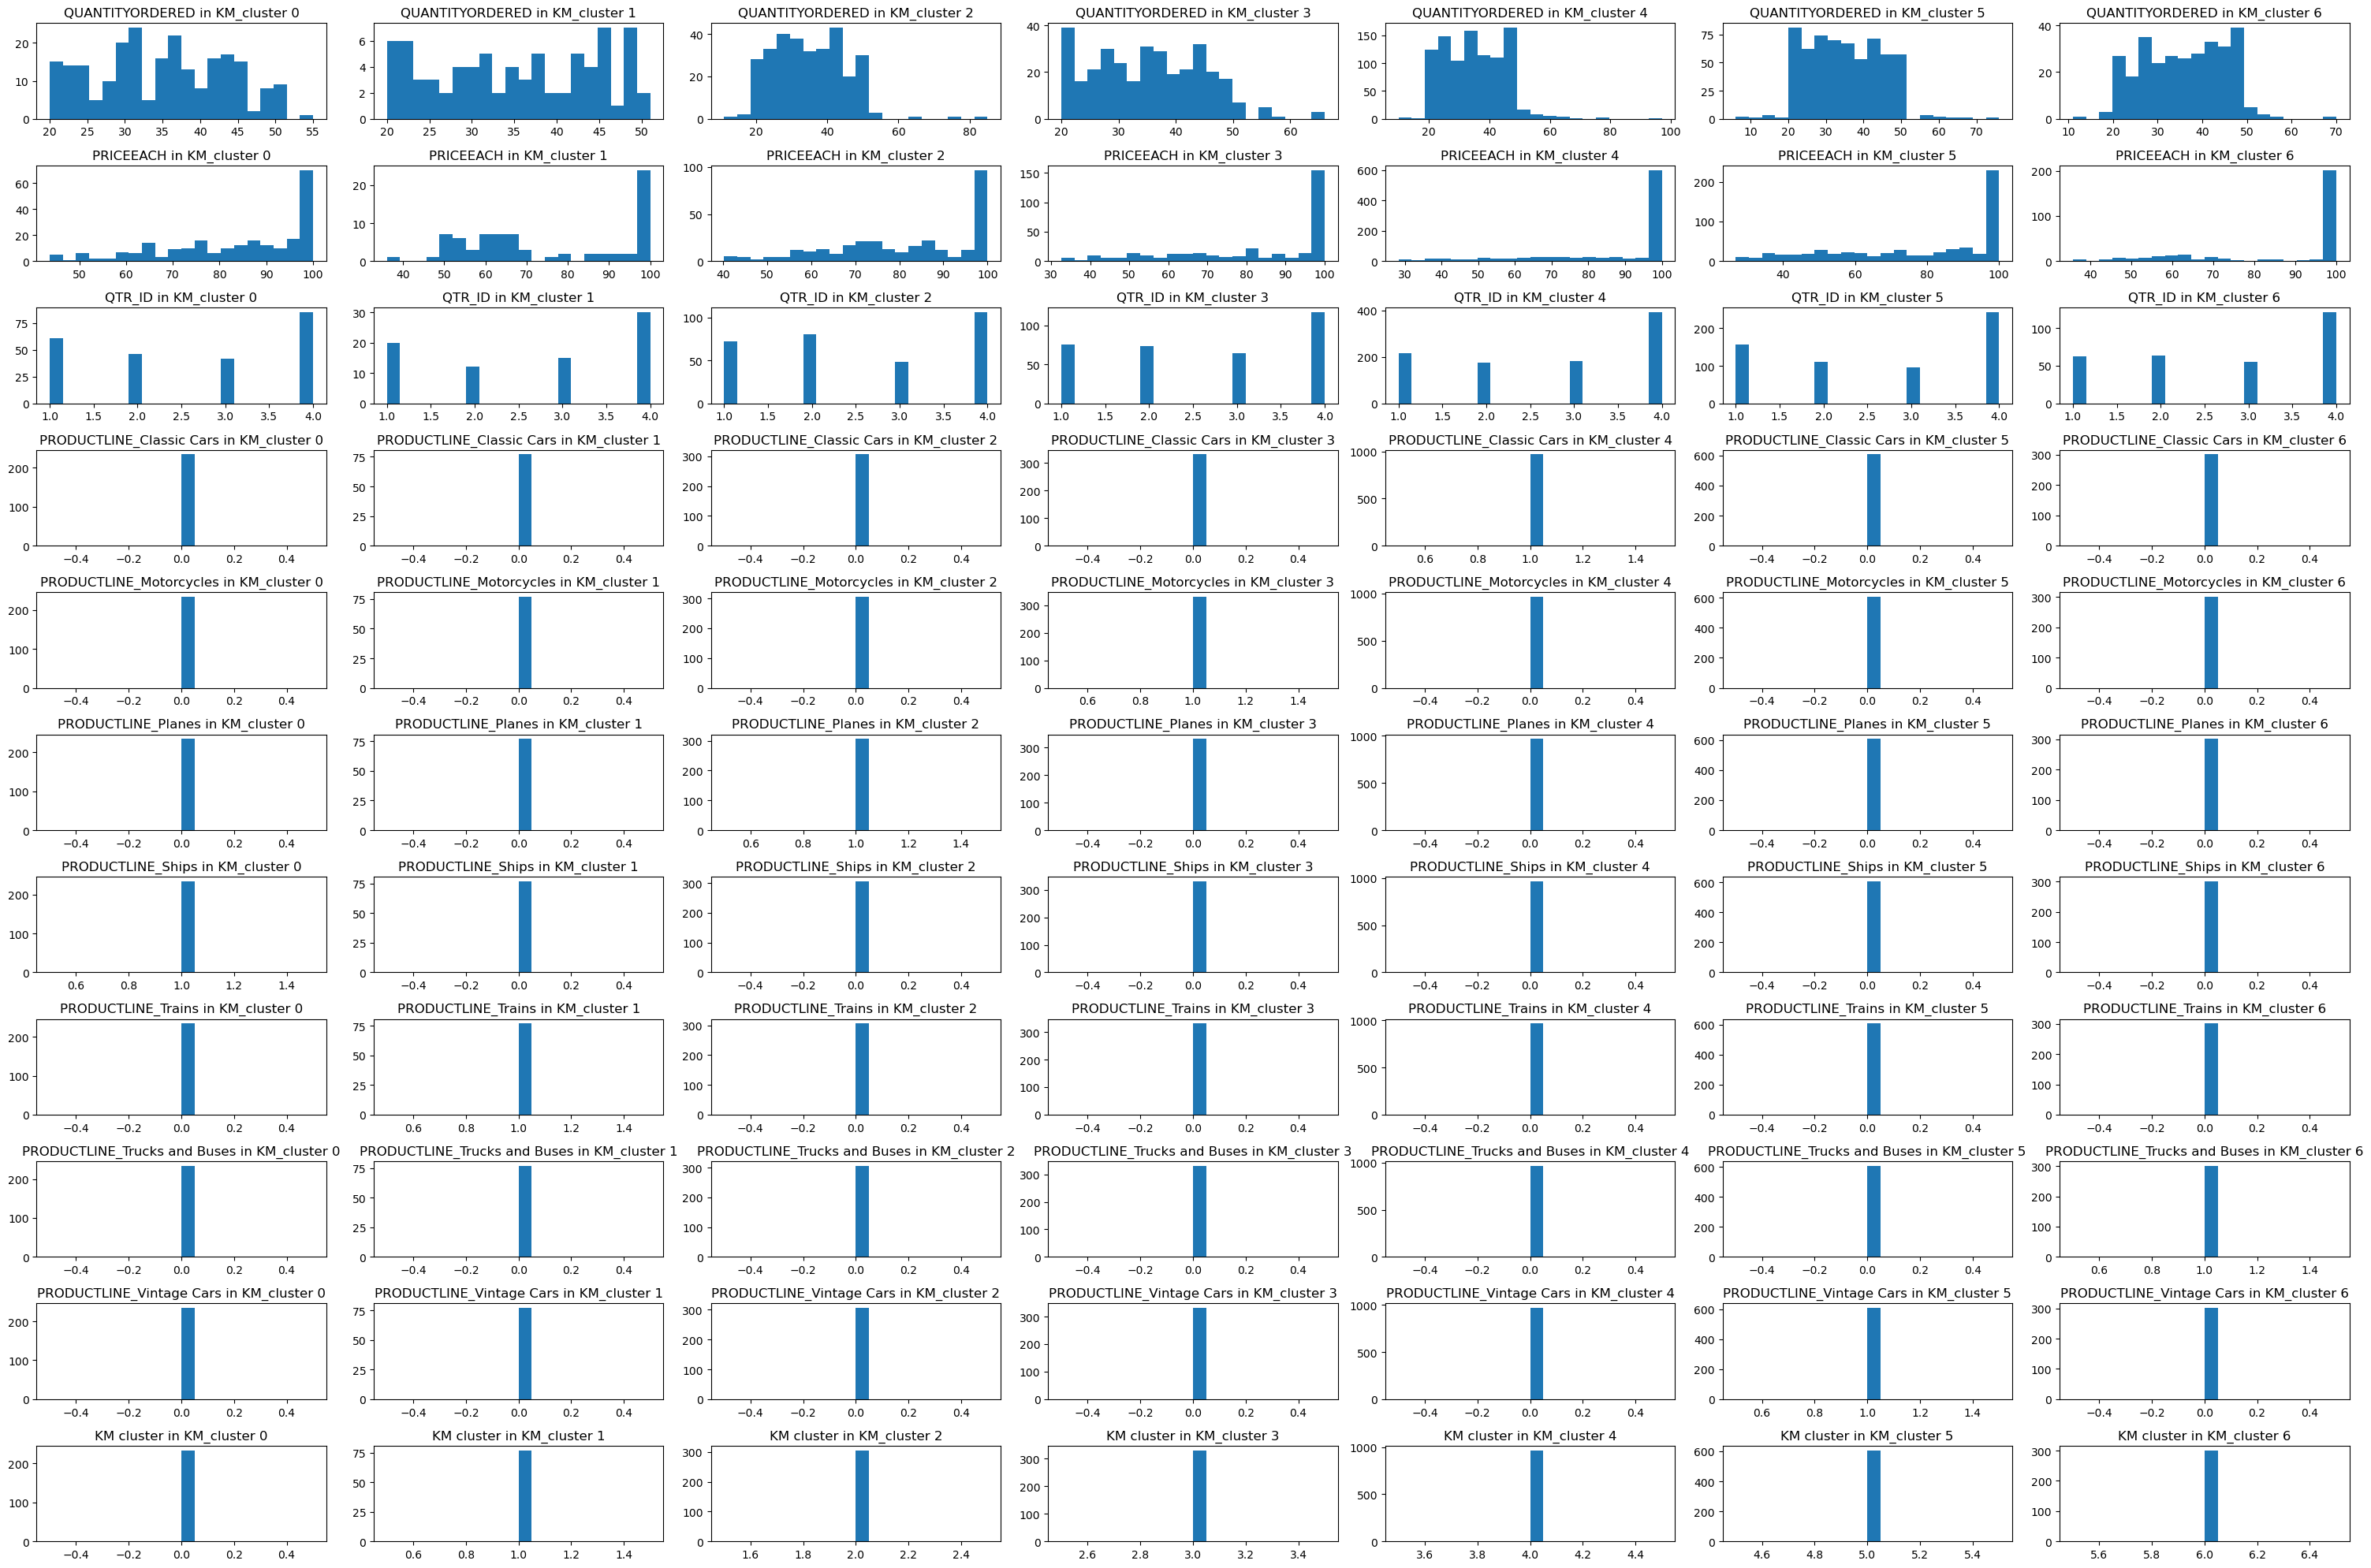

In [44]:
# Visualize the variables in each cluster using histograms for the K-means model
fig, axs = plt.subplots(len(km_df.columns), len(km_df.groupby('KM cluster')), figsize=(30,20))

for i, col in enumerate(km_df.columns):
    for j, cluster in enumerate(km_df.groupby('KM cluster')):
        axs[i,j].hist(cluster[1][col], bins=20)
        axs[i,j].set_title(col + ' in KM_cluster ' + str(cluster[0]))

plt.tight_layout()
plt.show()

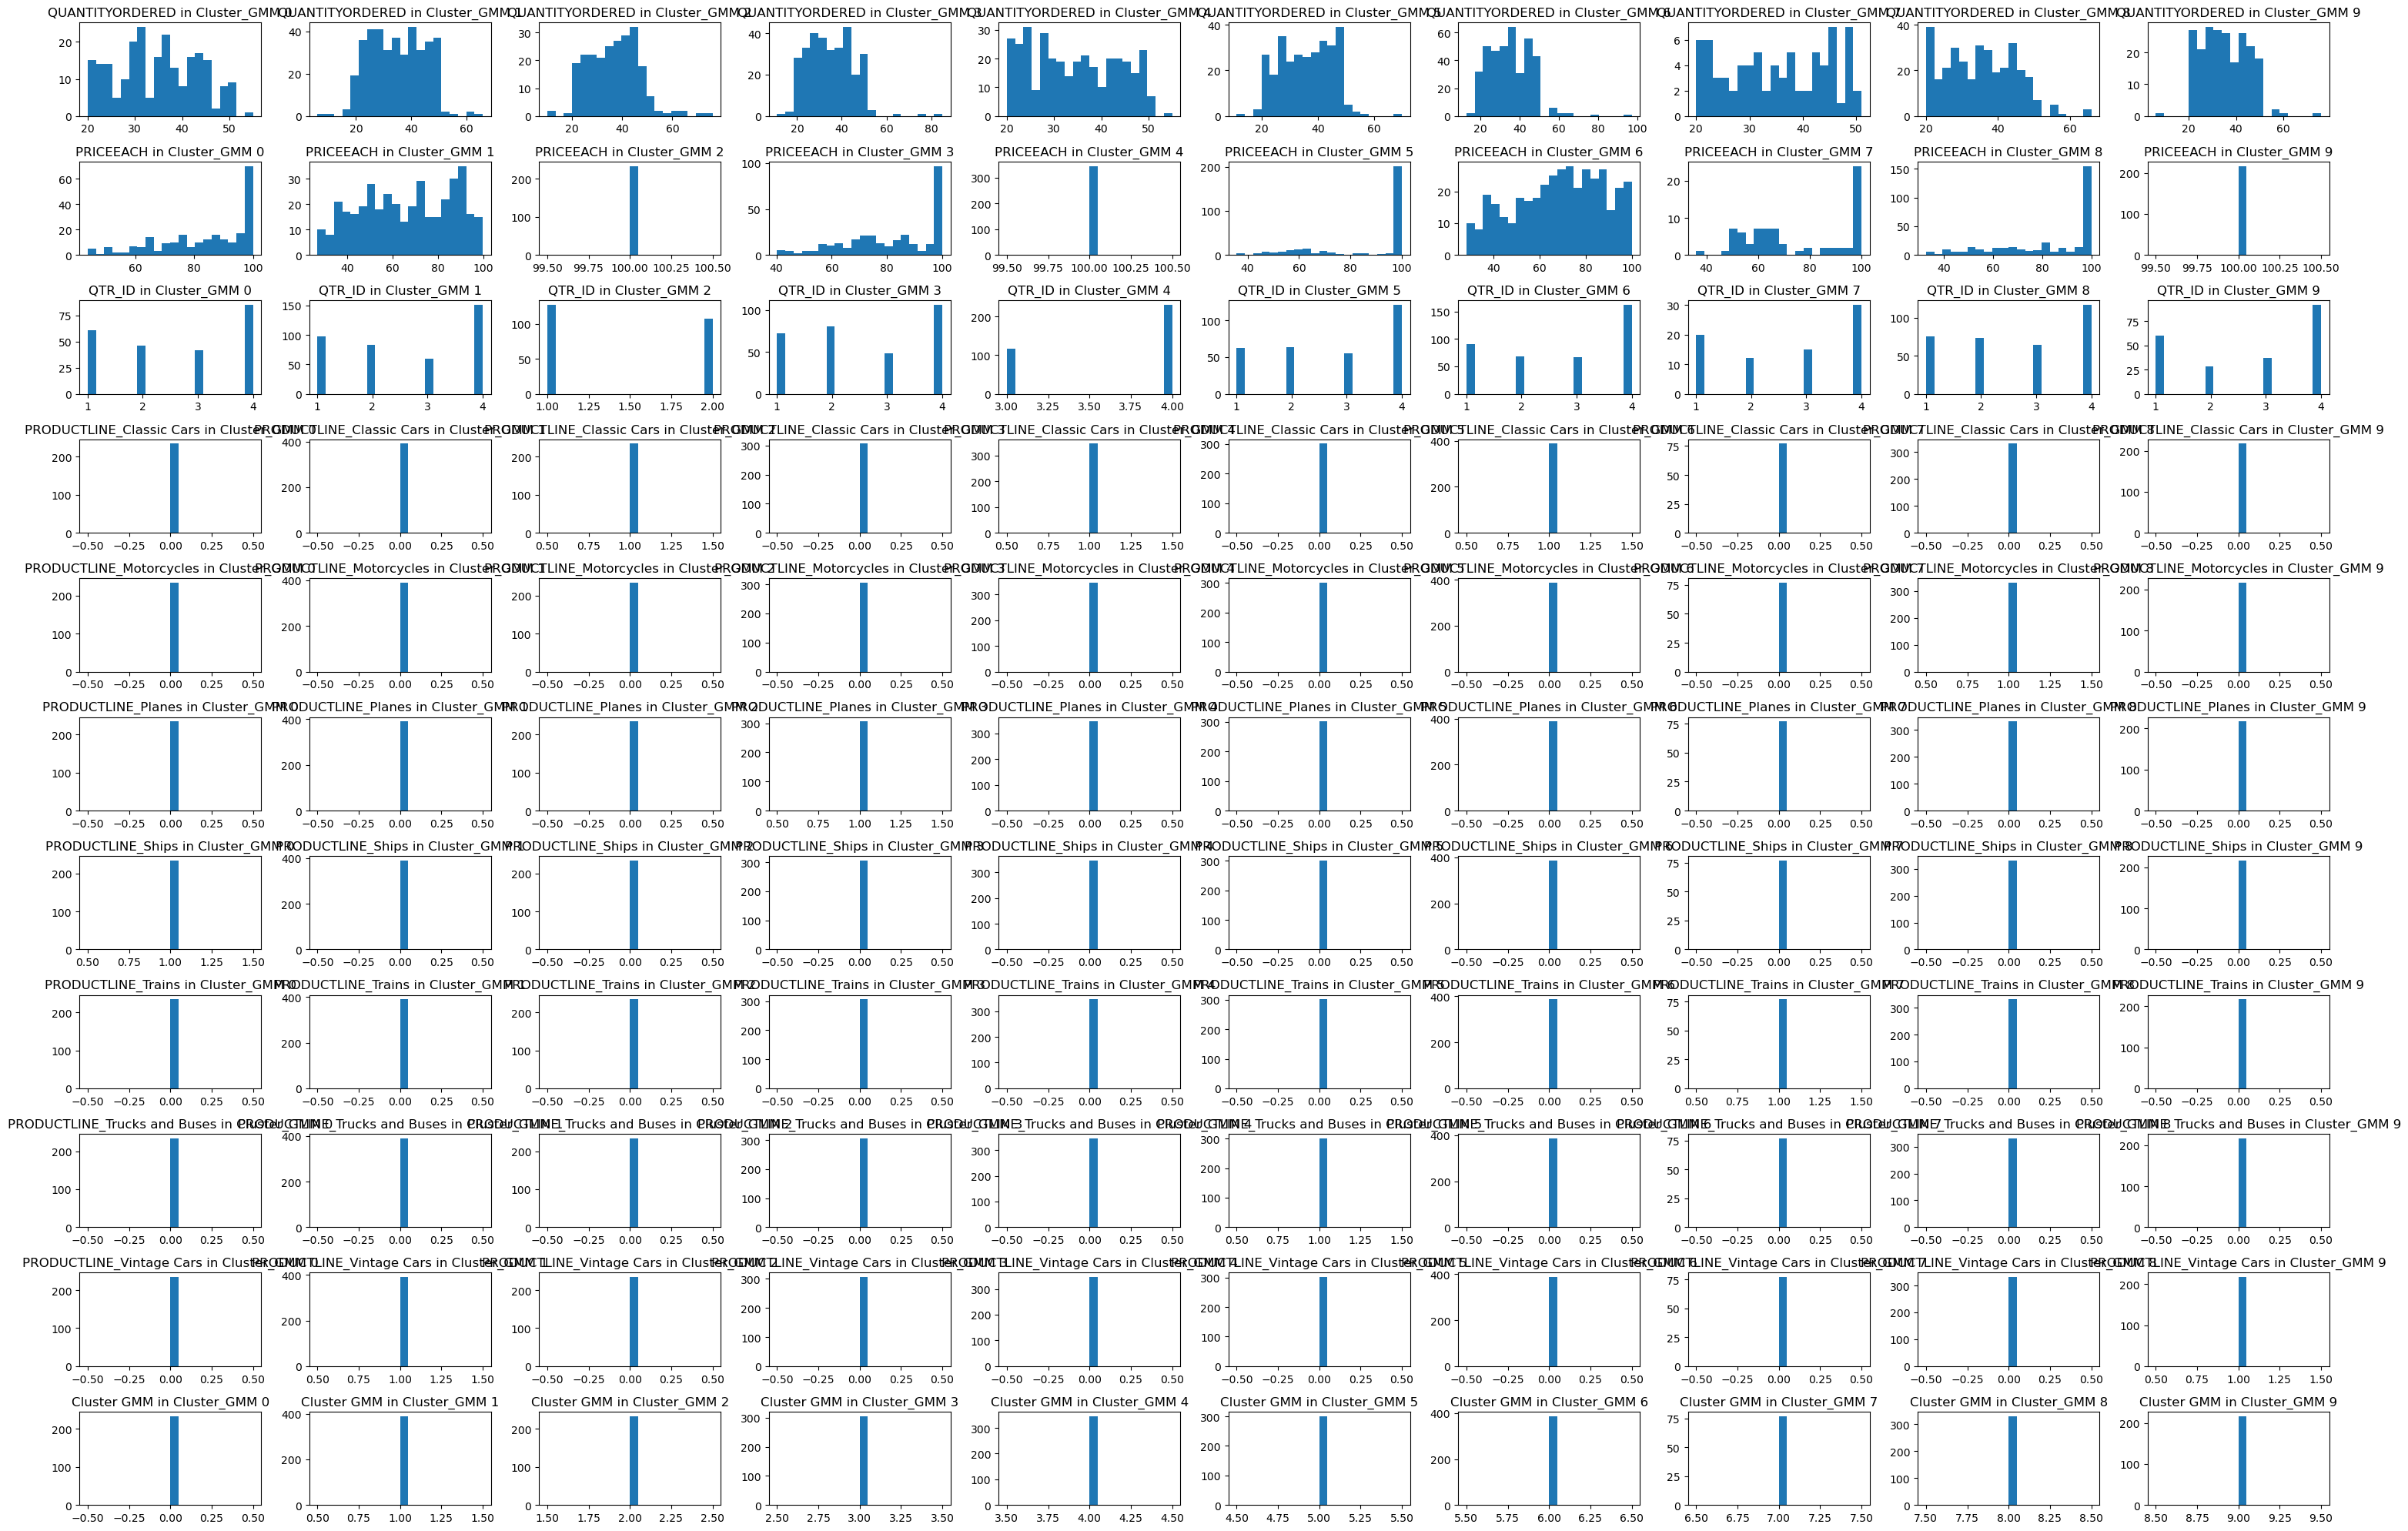

In [45]:
# Visualize the variables in each cluster using histograms for the GMM model
fig, axs = plt.subplots(len(gmm_df.columns), len(gmm_df.groupby('Cluster GMM')), figsize=(30,20))

for i, col in enumerate(gmm_df.columns):
    for j, cluster in enumerate(gmm_df.groupby('Cluster GMM')):
        axs[i,j].hist(cluster[1][col], bins=20)
        axs[i,j].set_title(col + ' in Cluster_GMM ' + str(cluster[0]))

plt.tight_layout()
plt.show()

- Looking at the clusters created by the K-means model, we can observe that it has formed a cluster for each product line. 

- However, upon examining the clusters created by the GMM model, it can be seen that it has identified three distinct groups among customers who have purchased in the classic car product line. The first cluster represents customers who only shopped at the beginning and end of the first quarter, while the second cluster represents customers who only shopped at the beginning and end of the third quarter. The third cluster represents customers who shopped throughout the year.

- Therefore, it can be concluded that the K-means model created clusters based on the product line, while the GMM model identified different purchasing behaviors among customers who have purchased in the classic car product line.

- The three clusters identified by the GMM model suggest that there are seasonal trends in the purchasing behavior of customers who purchase in the classic cars prudoct line, with some customers making purchases only in certain quarters of the year, while others make purchases throughout the year. This information will be useful for developing targeted marketing campaigns that are tailored to the purchasing behavior of different customer segments.

- Based on the results obtained, the GMM model outperformed the K-means model.

In [46]:
# save the model
joblib.dump(best_gmm, 'best_gmm.pkl')

['best_gmm.pkl']

In [59]:
# saving my final cluster df
gmm_df.to_csv('customer_segment.csv', index=False)

# Training and testing 

In [48]:
# Split data into training and testing sets
X = gmm_df.drop(['Cluster GMM'], axis=1)
y = gmm_df[['Cluster GMM']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
# Initialize the classifier
rfc = RandomForestClassifier()

# Train the classifier on the training data
rfc.fit(X_train, y_train)

# Use the trained classifier to predict the labels for the testing data
y_pred = rfc.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy, '%')

Accuracy: 0.9964601769911504 %


In [50]:
# Confusion_Matrix
print(metrics.confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46  0  0  0  0  0  0  0  0  0]
 [ 0 81  0  0  0  0  0  0  0  2]
 [ 0  0 49  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 71  0  0  0  0  0]
 [ 0  0  0  0  0 54  0  0  0  0]
 [ 0  0  0  0  0  0 77  0  0  0]
 [ 0  0  0  0  0  0  0 22  0  0]
 [ 0  0  0  0  0  0  0  0 72  0]
 [ 0  0  0  0  0  0  0  0  0 37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      0.98      0.99        83
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        71
           5       1.00      1.00      1.00        54
           6       1.00      1.00      1.00        77
           7       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        72
           9       0.95      1.00      0.97        37

    accuracy                           1.00       565
   macro avg       

# Saving the Random Forest model

In [66]:
# Fit the model on the entire dataset
rfc.fit(X, y)

# Save the model to disk
filename = 'rf_model.sav'
joblib.dump(rfc, filename)

# Load the model from disk
filename = 'rf_model.sav'
loaded_model = joblib.load(filename)

# Use the loaded model to make predictions
y_pred = loaded_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy, '%')

Accuracy: 1.0 %


# Deployment

In [65]:
# Load the saved model
model = joblib.load('rf_model.sav')

# Define the prediction function
def predict_cluster(features):
    # Make a prediction using the loaded model
    prediction = model.predict(features)
    # Return the prediction
    return prediction

# Define the Streamlit app
def app():
    # Set the title and sidebar
    st.set_page_config(page_title='Customer Segmentation', layout='wide')
    st.sidebar.title('Customer Segmentation')
    st.sidebar.text('Enter values for each feature to predict which cluster a customer fits in.')
    
    # Load the dataset with the feature descriptions
    feature_desc = pd.read_csv('customer_segment.csv')
    
    # Define the input fields
    features = {}
    for feature in feature_desc.columns[:-1]:
        features[feature] = st.number_input(feature, value=feature_desc[feature].mean())
    
    # Define the "Predict" button
    if st.button('Predict'):
        # Store the input features in a DataFrame
        features_df = pd.DataFrame(features, index=[0])
        # Call the prediction function and store the result
        result = predict_cluster(features_df)
        # Display the predicted cluster on the app
        st.write(f'The predicted cluster is: {result[0]}')

# Run the app
if __name__ == '__main__':
    app()

In [61]:
# app

Local URL: 'http://localhost:8514'
Network URL: 'http://10.0.0.150:8514'